In [129]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from bs4 import BeautifulSoup
import pandas as pd

## google

In [130]:
data = pd.read_excel('google scholar data.xls')

In [131]:
data = data.reset_index()

In [132]:
data = data.drop(['index'],axis = 1)

In [133]:
data.isnull().sum()

Unnamed: 0      0
논문 제목           1
저널              1
연도              1
초록            372
dtype: int64

In [134]:
data = data.dropna()

In [135]:
data = data.reset_index()

In [136]:
data = data.drop(['index'],axis = 1)

In [137]:
data['저널'].unique()

array(['지하공간,', 'Health,', 'health,', '…,', '현실,', '한국운동역학회지,', '자료집,',
       '한국사회체육학회지,', '논문집,', '한국자원공학회지,', '한국역학회지,', '학술대회논문집,',
       '중국어문논역총간,', '기술,', 'Korea,', '월간산업보건,', '-', 'Nursing,',
       'Medicine,', 'Ecology,', '리뷰,', '학술대회,', '한국운동학회지,', 'Technology,',
       '중국인문과학,', 'Nutr,', '한국지역지리학회지,', '국제정치연구,', '코칭능력개발지,',
       '한국체육과학회지,', '영문초록집,', 'Conference,', '한국동양정치사상사연구,',
       '보건교육건강증진학회지,', 'Geology,', '한국체육철학회지,', '한국여성체육학회지,', '번역학연구,',
       '논문지,', '대한인간공학회지,', '학술지,', '동의생리병리학회지,', '라틴아메리카연구,', '제,',
       '아시아문화,', '역사학보,', '외국문학연구,', '도교문화연구,', '기계저널,', '한국어학,',
       '한국웰니스학회지,', '한국체육측정평가학회지,', '정보관리연구,', '한국예술연구,', '추계학술대회,',
       '(한국지반공학회지),', '장신논단,', 'Mathematics,', '담론,', '중국어문학논집,', '철학논총,',
       '재활복지공학회논문지,', 'Agriculture,', 'KOSHAM,', '한국콘텐츠학회논문지,', '코기토,',
       '중국문화연구,', '운동학학술지,', '한국체육교육학회지,', '대한전자공학회', '체육과학연구,',
       '보건복지포럼,', '.', '대한조선학회지,', '중어중문학,', '정책,', '충청문화연구,',
       '한국초등체육학회지,', '인권,', '통상정보연구,', '동악어문학,'

In [138]:
data.loc[data['저널'] == '한국운동역학회지,', '저널'] = '한국운동역학회지'

In [139]:
data['연도'] = data['연도'].astype(int)

In [140]:
data = data[data['저널'] == "한국운동역학회지"]

In [141]:
data = data.drop_duplicates(subset=['논문 제목'])

In [142]:
data = data.drop(['Unnamed: 0'],axis = 1)

In [145]:
data = data.reset_index()

In [146]:
data = data.drop(['index'],axis = 1)

In [147]:
data

,논문 제목,저널,연도,초록
0,야구와 핸드볼 공 던지기 동작의 비교 분석,한국운동역학회지,1994,The goal of this research is to make a compara...
1,인체 공중 동작 시뮬레이션 프로그램 개발,한국운동역학회지,1994,A comprehensive simulation software package wa...
2,인체이동에 관한 운동역학적 분석 1,한국운동역학회지,1994,"During walking, jogging and sprinting, the sup..."
3,에어로빅스 운동시 부상 유발 동작의 운동 역학적 분석,한국운동역학회지,1995,One of the reason that the aerobic dance is po...
4,검도 머리치기 동작의 운동학적 연구,한국운동역학회지,1995,The purpose of this study is to construct a mo...
...,...,...,...,...
1696,8 주간 속도 기반 트레이닝이 전문 운동선수의 근력과 근 파워 능력에 미치는 영향,한국운동역학회지,2024,Objective: The purpose of this study is to app...
1697,8 주간 속도 기반 트레이닝이 단거리 육상선수의 순발력에 미치는 영향,한국운동역학회지,2024,Objective: The purpose of this study was to ev...
1698,바벨 백 스쿼트 시 운동 속도 조건에 따른 하지 근 활성도 및 무릎 관절의 부하량 비교,한국운동역학회지,2024,Objective: The purpose of this study was to co...
1699,컴파운드 양궁의 팔로우 스루 동작과 사격 정확도의 상관관계,한국운동역학회지,2024,Objective: This study aimed to investigate how...


## 토픽모델링

## 한국어 버전 워드클라우드

In [148]:
plt.rcParams['font.family'] = 'NanumGothic'  # Matplotlib 기본 폰트를 나눔고딕으로
plt.rcParams['axes.unicode_minus'] = False   # 음수 기호 깨짐 방지

In [49]:
from gensim.models import CoherenceModel

for n in range(3, 11):
    lda_model = models.LdaModel(corpus=corpus, num_topics=n, id2word=dictionary, passes=15, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    print(f"토픽 {n}개 → coherence: {coherence:.4f}")


토픽 3개 → coherence: 0.4648
토픽 4개 → coherence: 0.4487
토픽 5개 → coherence: 0.4180
토픽 6개 → coherence: 0.4580
토픽 7개 → coherence: 0.4232
토픽 8개 → coherence: 0.4373
토픽 9개 → coherence: 0.4253
토픽 10개 → coherence: 0.3933


### num_topics가 7일때

🧩 토픽 0: 0.039*"스윙" + 0.023*"분석" + 0.021*"골프" + 0.018*"압력" + 0.017*"선수" + 0.017*"운동" + 0.016*"보행" + 0.012*"지면" + 0.012*"동작" + 0.011*"균형"
🧩 토픽 1: 0.021*"연구" + 0.015*"클럽" + 0.014*"영향" + 0.012*"사용" + 0.011*"스윙" + 0.011*"움직임" + 0.011*"초보자" + 0.011*"퍼팅" + 0.011*"압력" + 0.010*"분석"
🧩 토픽 2: 0.039*"운동" + 0.023*"동작" + 0.021*"구간" + 0.021*"속도" + 0.019*"연구" + 0.017*"분석" + 0.010*"결과" + 0.009*"중심" + 0.009*"역학" + 0.009*"시간"
🧩 토픽 3: 0.026*"동작" + 0.024*"분석" + 0.019*"자세" + 0.018*"연구" + 0.015*"속도" + 0.014*"선수" + 0.013*"운동" + 0.011*"투사" + 0.011*"회전" + 0.011*"특성"
🧩 토픽 4: 0.034*"보행" + 0.018*"분석" + 0.017*"신발" + 0.015*"연구" + 0.013*"영향" + 0.012*"속도" + 0.010*"달리기" + 0.010*"비교" + 0.010*"안정" + 0.010*"요인"
🧩 토픽 5: 0.060*"분석" + 0.044*"동작" + 0.042*"운동학" + 0.012*"숙련" + 0.012*"변인" + 0.012*"연구" + 0.011*"비교" + 0.011*"선수" + 0.009*"대한" + 0.009*"중심"
🧩 토픽 6: 0.065*"관절" + 0.020*"발목" + 0.018*"보행" + 0.017*"무릎" + 0.016*"변화" + 0.016*"분석" + 0.013*"증가" + 0.012*"차이" + 0.012*"속도" + 0.012*"연구"
✅ 'lda_visualization.html' 파일이 생성되었습니다! 브라우저

C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wo

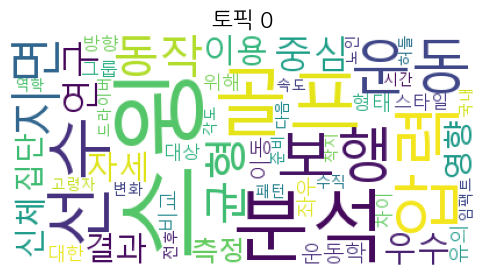

C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarni

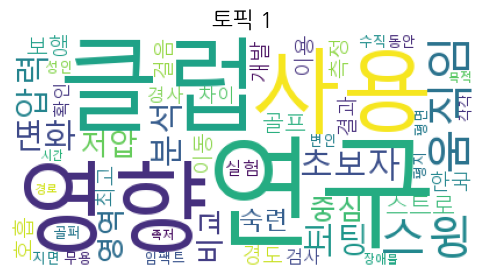

C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users

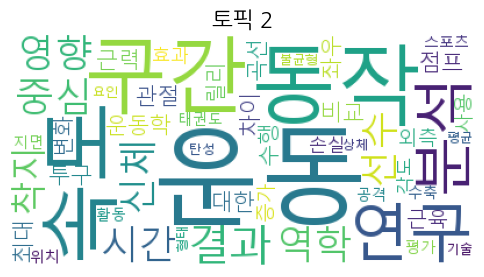

C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated a

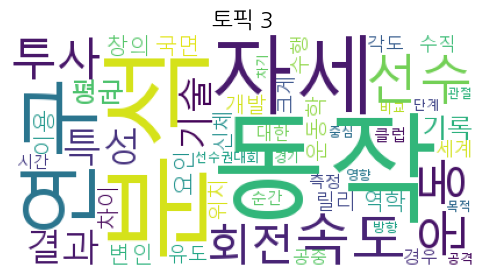

C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users

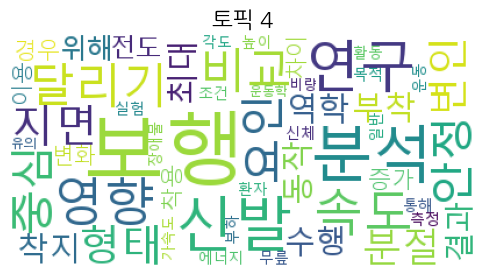

C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\kimha\A\lib\site-packages\wo

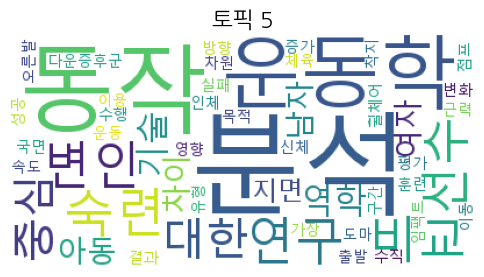

C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\kimha\A\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarni

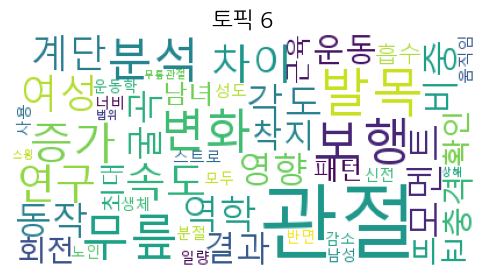

In [149]:
# 📦 필요한 라이브러리 설치 (한 번만 실행)
# !pip install pandas konlpy gensim pyLDAvis openpyxl wordcloud matplotlib

import pandas as pd
from konlpy.tag import Okt
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ============================================
# 1️⃣ 엑셀 데이터 불러오기
# ============================================

data['text'] = data['논문 제목'].fillna('') + ' ' + data['초록'].fillna('')

# ============================================
# 2️⃣ 형태소 분석 (명사만 추출)
# ============================================
okt = Okt()
texts = [[word for word in okt.nouns(str(sentence)) if len(word) > 1] for sentence in data['text']]

# ============================================
# 3️⃣ 단어 사전(Dictionary) 및 코퍼스(Corpus) 생성
# ============================================
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# ============================================
# 4️⃣ LDA 토픽모델 학습
# ============================================
lda_model = models.LdaModel(
    corpus=corpus,
    num_topics=7,             # 주제 개수 (원하면 5→10 정도로 변경 가능)
    id2word=dictionary,
    passes=15,
    random_state=42
)

# ============================================
# 5️⃣ 토픽별 주요 단어 출력
# ============================================
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"🧩 토픽 {idx}: {topic}")

# ============================================
# 6️⃣ pyLDAvis 시각화 (HTML 저장, 에러 없는 설정)
# ============================================
vis_data = gensimvis.prepare(
    lda_model, corpus, dictionary,
    mds='mmds',   # 'pcoa'보다 안정적
    n_jobs=1      # 병렬처리 끄기 → pickle 에러 방지
)
pyLDAvis.save_html(vis_data, "lda_visualization.html")
print("✅ 'lda_visualization.html' 파일이 생성되었습니다! 브라우저로 열면 시각화 확인 가능.")

# ============================================
# 7️⃣ 토픽별 워드클라우드 시각화
# ============================================
for i in range(lda_model.num_topics):
    plt.figure(figsize=(6, 6))
    plt.imshow(
        WordCloud(
            font_path="C:/Windows/Fonts/malgun.ttf",  # 윈도우 한글 폰트 경로
            background_color="white"
        ).generate_from_frequencies(dict(lda_model.show_topic(i, 50)))
    )
    plt.axis("off")
    plt.title(f"토픽 {i}", fontsize=16)
    plt.show()

